In [2]:
# Create a requirements.txt file based off of the repo's dependencies
%pip freeze > requirements.txt

# Install the dependencies
%pip install -r requirements.txt

^C
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import torch
print(torch.__version__)
print(torch.cuda.is_available())
print(torch.cuda.get_device_properties(0))
print(torch.cuda.get_device_name(0))
print(torch.cuda.current_device())
print(torch.cuda.device_count())

2.3.1+cu118
True
_CudaDeviceProperties(name='NVIDIA GeForce RTX 3070', major=8, minor=6, total_memory=8191MB, multi_processor_count=46)
NVIDIA GeForce RTX 3070
0
1


In [ ]:
import src.dataset.creation as dc

dc.collect_data()

2024-05-28 00:21:05,841 - INFO - Generating new data for data\nba_players_basic.csv for year 2001
2024-05-28 00:21:05,862 - INFO - Generating new data for data\nba_players_advanced.csv for year 2001
2024-05-28 00:21:05,891 - INFO - Data saved to data\nba_players_basic.csv and data\nba_players_advanced.csv for year 2001
2024-05-28 00:21:14,378 - INFO - Appending new data to data\nba_players_basic.csv for year 2002
2024-05-28 00:21:14,394 - INFO - Appending new data to data\nba_players_advanced.csv for year 2002
2024-05-28 00:21:14,454 - INFO - Data saved to data\nba_players_basic.csv and data\nba_players_advanced.csv for year 2002
2024-05-28 00:21:22,234 - INFO - Appending new data to data\nba_players_basic.csv for year 2003
2024-05-28 00:21:22,267 - INFO - Appending new data to data\nba_players_advanced.csv for year 2003
2024-05-28 00:21:22,305 - INFO - Data saved to data\nba_players_basic.csv and data\nba_players_advanced.csv for year 2003
2024-05-28 00:21:29,837 - INFO - Appending ne

In [2]:
from src.dataset import processing as dp

# Run the processing
df_tensor_ready, np_overlap, df_to_dict = dp.run_processing()

# Print the summary
dp.print_summary(df_tensor_ready, np_overlap)

           slug  Year  age  minutes_played  made_field_goals  \
6594  adamsst01  2014   20            1197                93   
7142  adamsst01  2015   21            1771               217   
7717  adamsst01  2016   22            2014               261   
8246  adamsst01  2017   23            2389               374   
8787  adamsst01  2018   24            2487               448   

      attempted_field_goals  attempted_three_point_field_goals  \
6594                    185                                  0   
7142                    399                                  2   
7717                    426                                  0   
8246                    655                                  1   
8787                    712                                  2   

      attempted_free_throws  defensive_rebounds  turnovers  \
6594                    136                 190         71   
7142                    205                 324         99   
7717                    196     

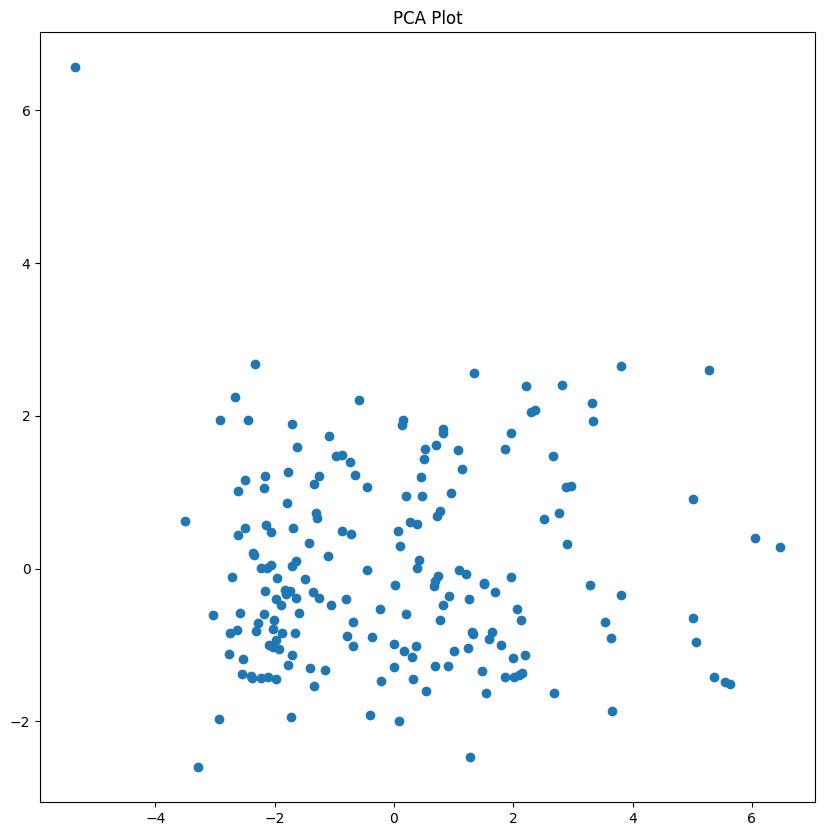

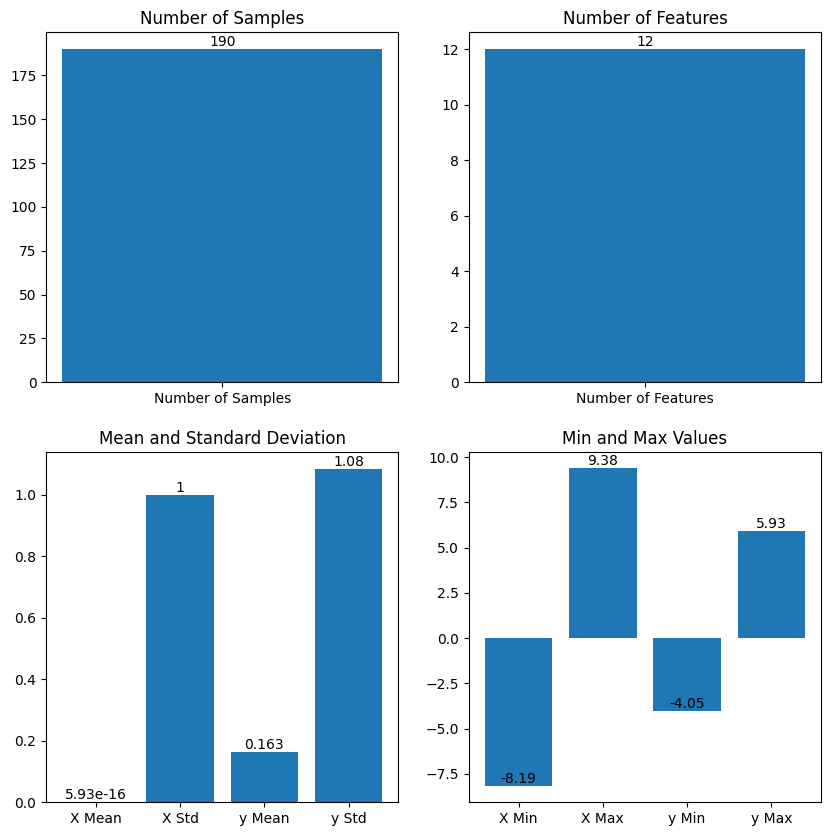

In [ ]:
from src.dataset import analytics as an

an.create_pca_plot()
an.create_graphs()

In [1]:
from src.dataset import torch as t_dataset
from src.dataset import torch_overlap as t_overlap_dataset

# dataset = dt.create_dataset()

t_dataset.print_dataset_example()

t_overlap_dataset.print_dataset_example()

| 2024-06-21 00:42:58,722 - INFO - torch.print_dataset_example:
---| Testing creation of NBAPlayerDataset class...
| 2024-06-21 00:42:58,723 - INFO - torch.create_dataset:
---| Creating dataset...
| 2024-06-21 00:42:58,724 - INFO - torch.create_dataset:
---| Loading data from data/nba_player_stats_5years.csv, data/nba_player_stats_5years_tensor_ready.csv, and data/nba_player_stats_5years.json...
| 2024-06-21 00:42:58,776 - INFO - torch.create_dataset:
---| Dataset created successfully.
| 2024-06-21 00:42:58,787 - INFO - torch.print_dataset_example:
---| Player Data:
tensor([ 0.5405,  0.1341,  1.2991,  1.2505,  0.5679, -0.9306,  1.0175,  0.7062,
         0.7140,  1.2769,  1.0023,  0.8792], dtype=torch.float64)
Players Targets:
tensor([[-0.1277, -1.3487, -0.3164, -0.8599, -0.9176, -0.9441, -0.0947, -0.0685,
         -0.1996, -0.5964,  1.0653, -0.6374],
        [ 0.0394, -0.9780,  0.4025, -0.1227, -0.3144, -0.9306,  0.4169,  0.8667,
          0.2492, -0.0185,  1.1072, -0.3485],
        [ 

In [1]:
from src.machine_learning import train_models as tm

# Use:
   # 1. 'nn_lstm' for the LSTM model 
   # 2. 'custom_lstm' for the custom LSTM model
   # 3. 'nn_one_to_one' for the one to one neural network model
   # 4. 'nn_many_to_one' for the many to one neural network model
# model = tm.run_model('nn_lstm', 100)
# model = tm.run_model('custom_lstm', 200)
# model = tm.run_model('nn_one_to_one', 500)
model = tm.run_model('nn_many_to_one', 500)

| 2024-06-22 02:09:02,473 - INFO - train_models.run_model:
---| Running nn_one_to_one model on cuda...
| 2024-06-22 02:09:02,474 - INFO - train_models.run_model:
---| Hyperparameters: input_size=12, hidden_size=12, output_size=12, num_layers=5.
                Using learning rate of: 0.01.
                Using device: cuda.
                Training DataLoader length: 44
                Test DataLoader length: 44
| 2024-06-22 02:09:06,998 - INFO - train_models.run_model:
---| Training model (starting loop)...


Epoch: 500/500, Batch: 44/44: 100%|██████████| 500/500 [02:37<00:00,  3.18it/s, Loss=0.000771]

| 2024-06-22 02:11:44,160 - INFO - train_models.run_model:
---| Evaluating model...



Batch: 44/44: 100%|██████████| 44/44 [00:11<00:00,  4.00it/s, Loss=0.000612]

| 2024-06-22 02:11:55,164 - INFO - train_models.run_model:
---| Saving model at data/models/nn_one_to_one.pth.


| 2024-06-22 02:11:55,173 - INFO - train_models.run_model:
---| Confirmation: Model saved at data/models/nn_one_to_one.pth.
| 2024-06-22 02:11:55,175 - INFO - train_models.run_model:
---| Running nn_many_to_one model on cuda...
| 2024-06-22 02:11:55,176 - INFO - train_models.run_model:
---| Hyperparameters: input_size=60, hidden_size=12, output_size=12, num_layers=5.
                Using learning rate of: 0.01.
                Using device: cuda.
                Training DataLoader length: 44
                Test DataLoader length: 44
| 2024-06-22 02:11:55,179 - INFO - train_models.run_model:
---| Training model (starting loop)...


  0%|          | 0/500 [00:00<?, ?it/s]


RuntimeError: mat1 and mat2 shapes cannot be multiplied (160x12 and 60x12)

In [ ]:
from src.machine_learning import use_models as um

um.use_model(0)

| 2024-06-12 21:50:10,637 - INFO - train_models.<module>:
---| Hyperparameters: input_size=12, hidden_size=12, output_size=12, num_layers=3.
| 2024-06-12 21:50:10,639 - INFO - train_models.<module>:
---| Using learning rate of: 0.01.
| 2024-06-12 21:50:10,641 - INFO - train_models.<module>:
---| Using device: cpu.
| 2024-06-12 21:50:10,643 - INFO - train_models.<module>:
---| Training DataLoader length: 6
| 2024-06-12 21:50:10,643 - INFO - train_models.<module>:
---| Test DataLoader length: 6
| 2024-06-12 21:50:10,695 - INFO - use_models.use_model:
---| Found .pth files: ['nn_lstm.pth']
| 2024-06-12 21:50:10,697 - INFO - use_models.use_model:
---| Using argument file index 0.
| 2024-06-12 21:50:10,699 - INFO - use_models.load_model:
---| Loading nn_lstm.pth and creating model...
| 2024-06-12 21:50:10,711 - INFO - use_models.load_model:
---| Loaded model: LSTM(12, 12, num_layers=3, batch_first=True)
| 2024-06-12 21:50:10,735 - INFO - dataset_torch.get_dataset_example:
---| Getting examp